<font size='5px' color='red'> Support vector machines(SVMs)<font/>

<font size='5px' color='blue'>Introduction<font/>

https://towardsdatascience.com/support-vector-machine-simply-explained-fee28eba5496

## 1 What is the support vector machine

- You can think of it like a “road machine”, which separates the left,right-side cars, buildings, pedestrians and makes the widest lane as possible. And those cars, buildings, really close to the street is the support vectors.
- SVM: A supervised learning model with associated learning algorithms that analyze data and recognize patterns, used for classification and regression analysis
- SVM:(the “road machine”) is responsible for finding the decision boundary to separate different classes and maximize the margin.
    - SVM when given a two categories and a new example, it assigns it to one of them.
    - The alg will choose the line that produce the maximum gap (max margin) between the two categories.




## 1.1 Terminology

- Margins are the (perpendicular) distances between the line and those dots closest to the line.
- suppor vectors: the line the hyperplane margin touches

## 2 How does it work in linear separable scenarios

- SVM here is called non-probablisitic binary linear classifier:
    - Binary: as it split the data into too category
    - linear: as it classifiy when classes are linearly seperable
    - Non-probabilisitc:: as it gives either 0, or 1 not a probability

- SVM needs to find the optimal line with the constraint of correctly classifying either class:
   - Constrain/ensure that each observation is on the correct side of the Hyperplane
   - Pick up the optimal line so that the distance from those closest dots to the Hyperplane, so-called margin, is maximized
- We change feature standarization (C, grid search) to allow find optimum margin by allowing some misclassifications

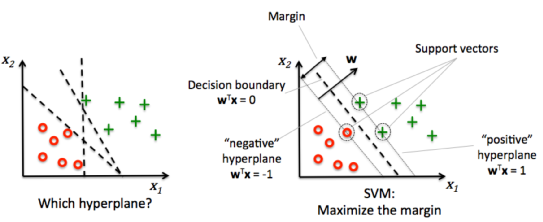

In [4]:
Image('SVM-Hyperplane-Maximizing-Margin.png')

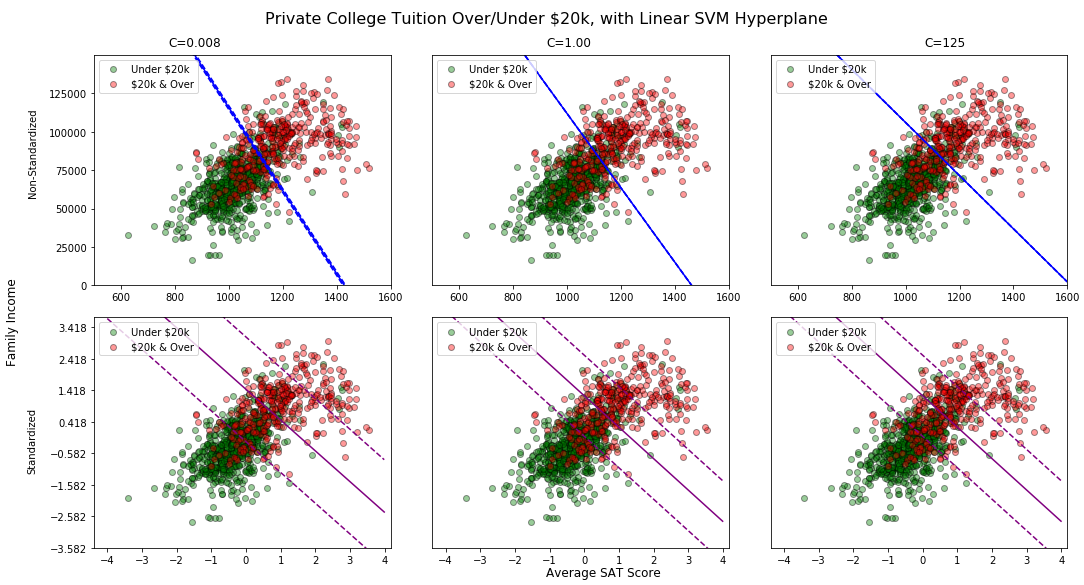

In [11]:
Image('Feature Standarization.png')

## 2.1 Terminology
- Hyperplane is an (n minus 1)-dimensional subspace for an n-dimensional space. For Example: 
    - For a 2-dimension space, its hyperplane will be 1-dimension, which is just a line.
    - For a 3-dimension space, its hyperplane will be 2-dimension, which is a plane that slice the cube.
- Margins: The distance between seperating hyper plane to the closest dot in either side
- Loosen up: means reducing or increasing the margin distances

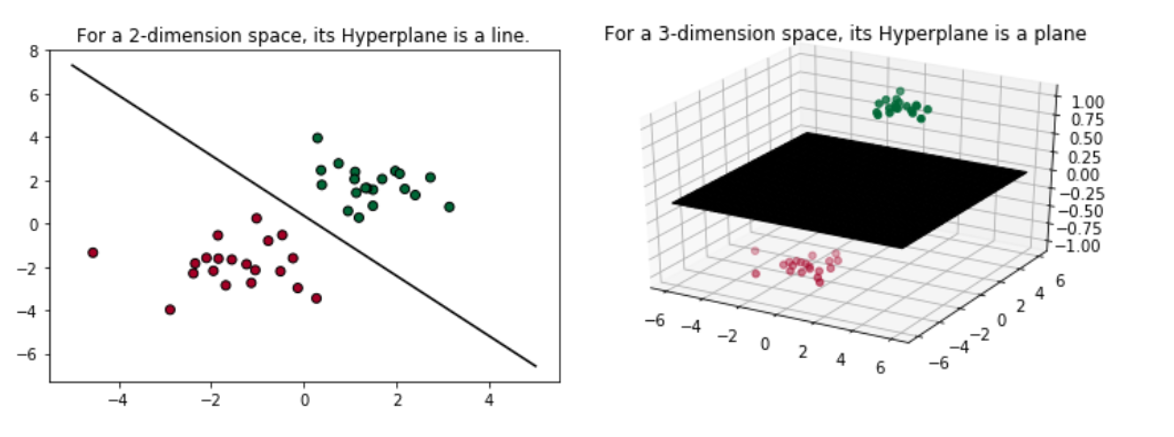

In [8]:
Image('HyperPlane.png')

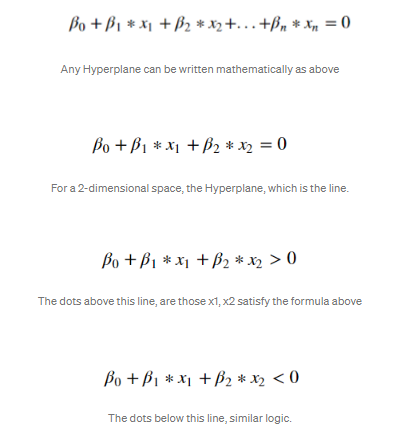

In [9]:
Image('HyperPlane Formula.PNG')

## 3 How does it work in linear non-separable scenarios

In the linearly separable case, SVM is trying to find the hyperplane that maximizes the margin, with the condition that both classes are classified correctly. But in reality, datasets are probably never linearly separable, so the condition of 100% correctly classified by a hyperplane will never be met.

- SVM address non-linearly separable cases by introducing two concepts: Soft Margin and Kernel Tricks.

## 3.1 Soft Margin
   - It means it will allow for some misclassification to stay in the linear phase
   - SVM tolerates a few dots to get misclassified and tries to balance the trade-off between finding a line that maximizes the margin and minimizes the misclassification.
   - We work allow it by increasing the value of C ( It's like 1/lambda) (more C means more missclassifieds)
   - C is called penalty term

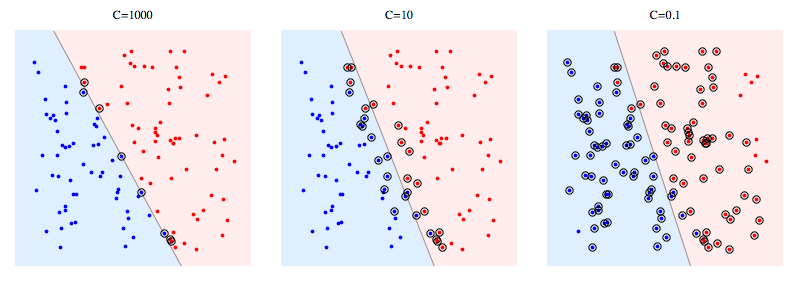

In [12]:
Image('Soft VS Hard.png')

## 3.1.1 Types of misclassifications tolerated by SVM

- The dot is on the wrong side of the decision boundary but on the correct side/ on the margin (shown in left)
- The dot is on the wrong side of the decision boundary and on the wrong side of the margin (shown in right)

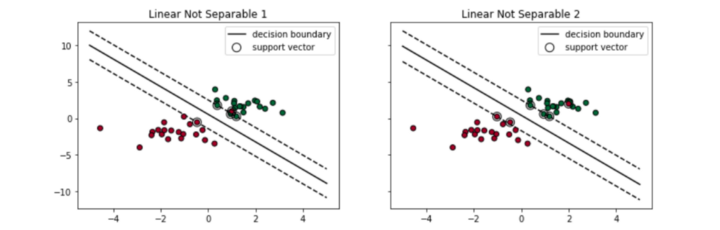

In [13]:
Image('Types of misclassification in soft.png')

## 3.2 Kernal Trick

- It will turn the 2D data into 3D to show the data in higher dimention which will help us make the data separable if they are non linearaly seperable

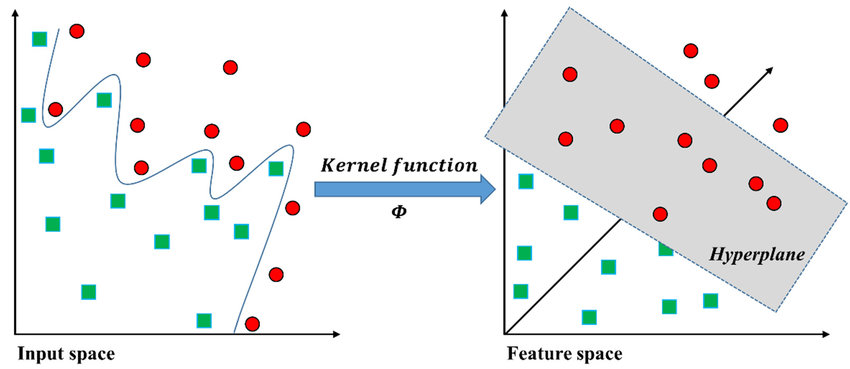

In [10]:
Image('Kernal Trick.png')

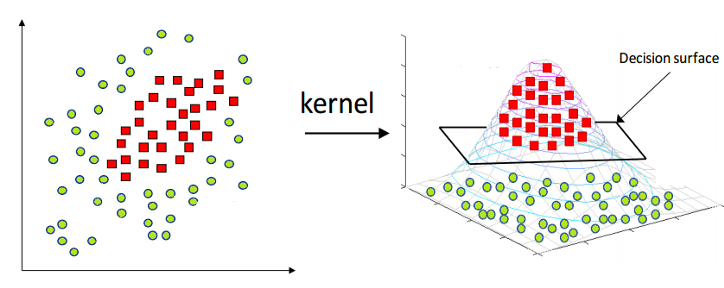

In [4]:
Image('Kernal.png')

## 3.2.1 Kernal Fns

- In Sklearn — svm.SVC(), we can choose ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable as our kernel/transformation.
- I will give examples of the two most popular kernels — Polynomial and Radial Basis Function(RBF).

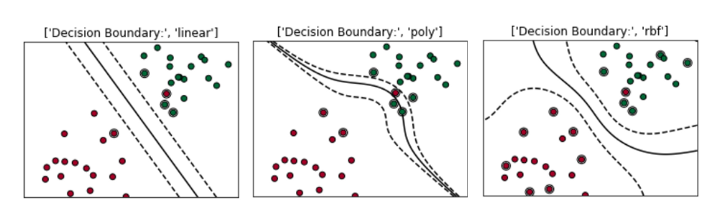

In [14]:
Image('Kernal Trick Fns.png')

## 1- Polynomial Kernel

- Think of the polynomial kernel as a transformer/processor to generate new features by applying the polynomial combination of all the existing features.
- For Example:
    - Existing Feature: X = np.array([-2,-1,0, 1,2]), Label: Y = np.array([1,1,0,1,1])
    - It’s impossible for us to find a line to separate the yellow (1)and purple (0) dots (shown on the left).
    - Solu:
        - If we apply transformation X² to get:New Feature: X = np.array([4,1,0, 1,4])
        - Then, by combing the existing and new feature, we can certainly draw a line to separate the yellow purple dots (shown on the right).
- Support vector machine with a polynomial kernel can generate a non-linear decision boundary using those polynomial featuresm


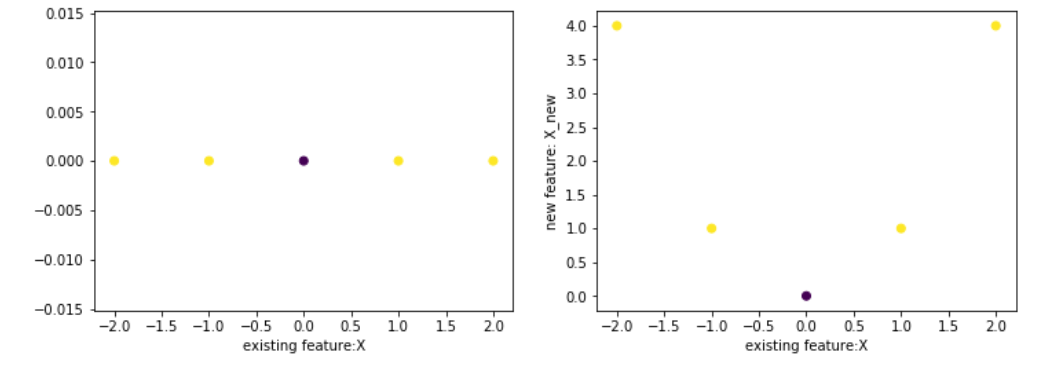

In [19]:
Image('Polynominal Kernal fn.png')

## 2 -Radial Basis Function (RBF) kernel
   - Think of the Radial Basis Function kernel as a transformer/processor to generate new features by measuring the distance between all other dots to a specific dot/dots — centers. The most popular/basic RBF kernel is the Gaussian Radial Basis Function:

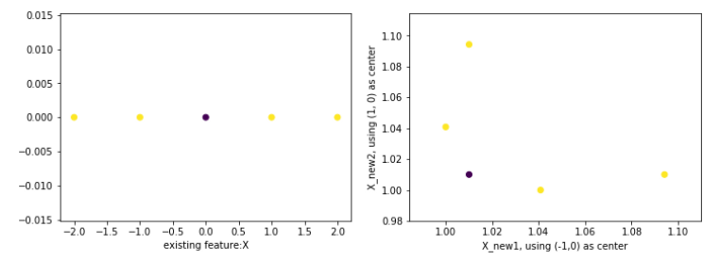

In [20]:
Image('Radial Kernal.png')

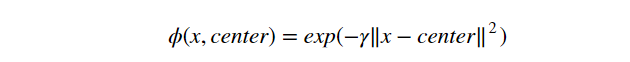

In [21]:
Image('Kernal Radial Distance fn.png')

## 3.2.2 Gamma

- Gamma is a hyperparameter that we can tune for when we use SVM with kernel. Similar to the penalty term — C in the soft margin

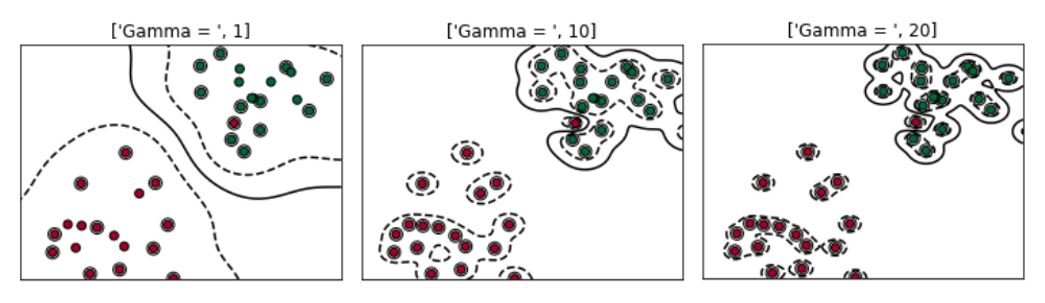

In [16]:
Image('gamma.png')

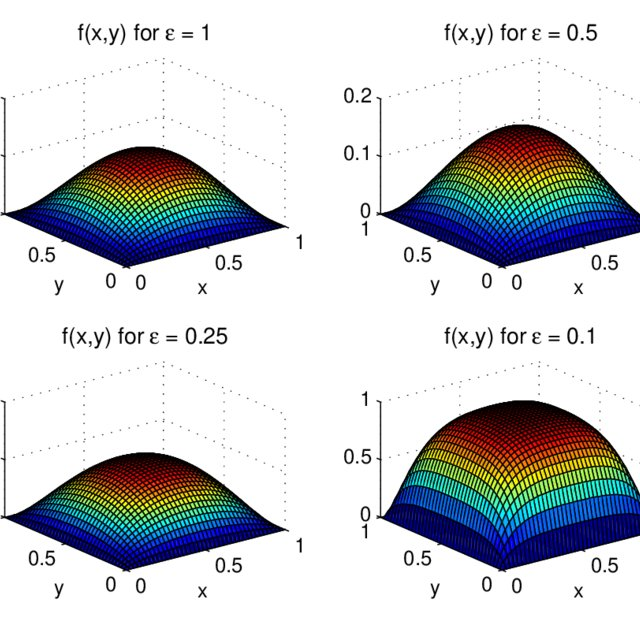

In [17]:
Image('gamma.jpg')

<font size='5px' color='blue'>Cancer Prediction<font/>

## 1 Packages

In [5]:
import pandas as pd
import numpy as np
from IPython.display import Image

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 2 Explore Data

In [7]:
from sklearn.datasets import load_breast_cancer

In [8]:
cancer=load_breast_cancer()
    # An instance of loading breas_cancer

In [9]:
type(cancer)

sklearn.utils.Bunch

In [10]:
cancer.keys()
    # Our dataset is a dictionary

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [11]:
df_feat=pd.DataFrame(cancer['data'],columns=cancer['feature_names'])

In [12]:
df_feat.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [13]:
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [14]:
cancer['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [15]:
cancer['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [16]:
print(cancer)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [17]:
df_feat.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [18]:
target=np.reshape(cancer['target'],(569,1))

In [19]:
target_ser=pd.DataFrame(target,columns=['target'])

In [20]:
target_ser.head()

,target
0,0
1,0
2,0
3,0
4,0


In [21]:
cancer_full=pd.concat([df_feat,target_ser],axis=1)

In [22]:
cancer_full

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


<AxesSubplot:>

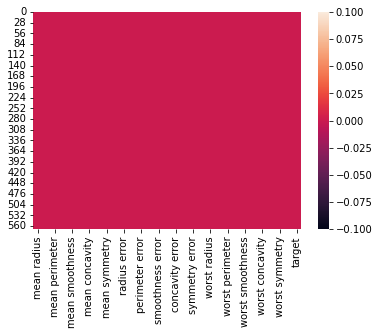

In [23]:
sns.heatmap(cancer_full.isnull())

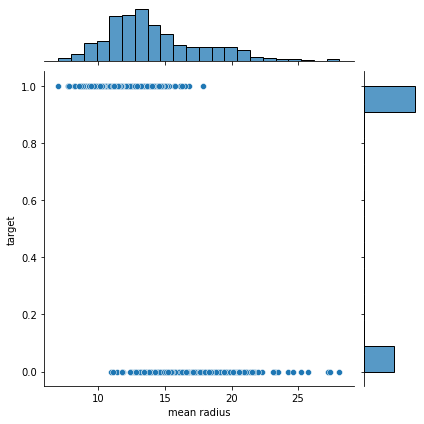

In [24]:
sns.jointplot(y='target',x='mean radius',data=cancer_full)

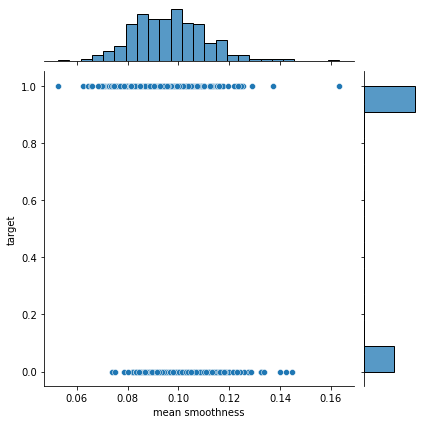

In [25]:
sns.jointplot(y='target',x='mean smoothness',data=cancer_full)

## 3 Preprocessing

In [26]:
X=df_feat

In [27]:
y=cancer['target']

## 4 Training

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [22]:
from sklearn.svm import SVC

In [31]:
model=SVC()

In [32]:
model.fit(X_train,y_train)

SVC()

In [77]:
SVC

abc.ABCMeta

## 5  Prediction

In [33]:
y_pred=model.predict(X_test)

## 6 Evaluation  

In [34]:
from sklearn.metrics import classification_report,confusion_matrix

In [35]:
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[[ 56  10]
 [  3 102]]


              precision    recall  f1-score   support

           0       0.95      0.85      0.90        66
           1       0.91      0.97      0.94       105

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.93      0.92      0.92       171



<font size='5px' color='blue'>Grid Search<font/>

## 1 Introduction

Finding the right parameters (like what C or gamma values to use) is a tricky task! But luckily, we can be a little lazy and just try a bunch of combinations and see what works best! This idea of creating a 'grid' of parameters and just trying out all the possible combinations is called a Gridsearch, this method is common enough that Scikit-learn has this functionality built in with GridSearchCV! The CV stands for cross-validation which is the

GridSearchCV takes a dictionary that describes the parameters that should be tried and a model to train. The grid of parameters is defined as a dictionary, where the keys are the parameters and the values are the settings to be tested.
   - To find the best parameter in SVM model
   - It perform a loop on CV to fit the parameter, then gets back to normal loop and run fit on data without crossvalidation
   - It is most commonly used Algorithm for hyperparameter tuning in machine learning models.
   

In [36]:
from sklearn.model_selection import GridSearchCV

In [ ]:
SVC

In [42]:
param_grid={'C':[.1,1,10,100,1000],'gamma':[1,0.1,0.01,0,.001,0.0001]}
    # We will creat a dictionary
        # We will I/P the parameters as Keys
        # The values are the setting to be test
    # C controls the cost of misclassification(1/lambda)
        # low C means high variance(Panalize the cost)
        # High C means high bias( )
    # gamma is the free parameter in Kernel fn
        # Small gamma means gaussian for large variance
        # High gamma leads to high bias and low variance(Doesn't have a wide range influence)
        
    # rbf:the radial basis function kernel, or RBF kernel
        # A popular kernel function used in various kernelized learning algorithms. 
        # Called the squared Euclidean distance between the two feature vectors.
    
    

In [38]:
from IPython.display import Image

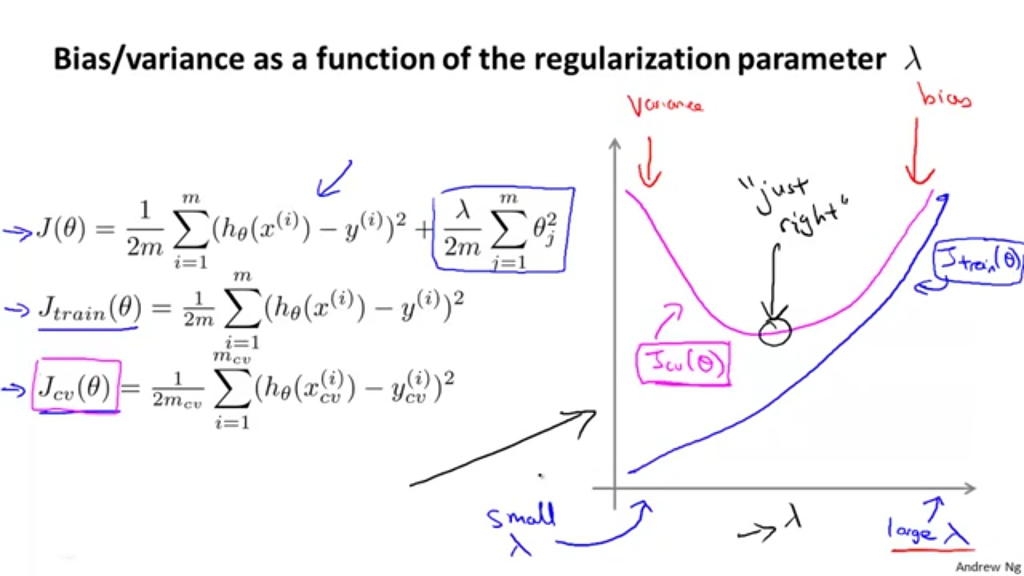

In [39]:
Image('lambda.jpeg')

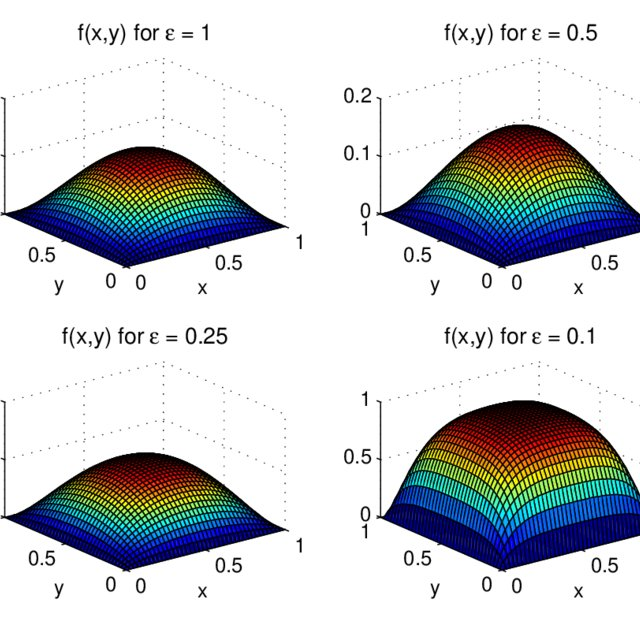

In [40]:
Image('gamma.jpg')
    # Gamma the free parameter

## 2 Training with GridSearch & same dataset

In [43]:
param_grid

{'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0, 0.001, 0.0001]}

In [66]:
grid= GridSearchCV(SVC(),param_grid,verbose=0)
    # It takes the estimator(model), then create a new estimator the behave the same
    # refit=True means to refit the new estimator
    # verbose: Text O/P of the discribtion of the process
        # To know if the model is doing something
        #  Detailed print out of your fit of the data to GridSearchCV,the more the better
    # estimator is the model 

In [55]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0, 0.001, 0.0001]})

In [63]:
grid= GridSearchCV(SVC(),param_grid,verbose=4)

In [64]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.637 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.637 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.625 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.633 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.633 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.637 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.637 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.625 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.633 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.633 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.637 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01

[CV 1/5] END ....................C=100, gamma=0;, score=0.637 total time=   0.0s
[CV 2/5] END ....................C=100, gamma=0;, score=0.637 total time=   0.0s
[CV 3/5] END ....................C=100, gamma=0;, score=0.625 total time=   0.0s
[CV 4/5] END ....................C=100, gamma=0;, score=0.633 total time=   0.0s
[CV 5/5] END ....................C=100, gamma=0;, score=0.633 total time=   0.0s
[CV 1/5] END ................C=100, gamma=0.001;, score=0.887 total time=   0.0s
[CV 2/5] END ................C=100, gamma=0.001;, score=0.912 total time=   0.0s
[CV 3/5] END ................C=100, gamma=0.001;, score=0.900 total time=   0.0s
[CV 4/5] END ................C=100, gamma=0.001;, score=0.937 total time=   0.0s
[CV 5/5] END ................C=100, gamma=0.001;, score=0.924 total time=   0.0s
[CV 1/5] END ...............C=100, gamma=0.0001;, score=0.925 total time=   0.0s
[CV 2/5] END ...............C=100, gamma=0.0001;, score=0.912 total time=   0.0s
[CV 3/5] END ...............

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0, 0.001, 0.0001]},
             verbose=4)

In [58]:
grid.best_params_
    # Grabs the best combination

{'C': 1, 'gamma': 0.0001}

In [59]:
grid.best_estimator_

SVC(C=1, gamma=0.0001)

## 3 Prediction with GridSearch & same dataset

In [61]:
y_pred2=grid.predict(X_test)

## 4 Evaluation with GridSearch & same dataset

In [62]:
print(confusion_matrix(y_test,y_pred2))
print('\n')
print(classification_report(y_test,y_pred2))

[[ 59   7]
 [  4 101]]


              precision    recall  f1-score   support

           0       0.94      0.89      0.91        66
           1       0.94      0.96      0.95       105

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171

